# lab5 exercise
## Shang mingxia P-COM0077/19
## LING HUI TING P-COM0086/19

In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; 
import warnings
warnings.filterwarnings("ignore")
sns.set()

## 1. import data

In [74]:
data=pd.read_csv('Iris.csv')

## 2. exploration

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaller = StandardScaler()
labelencoder = LabelEncoder()
data['Species']= labelencoder.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


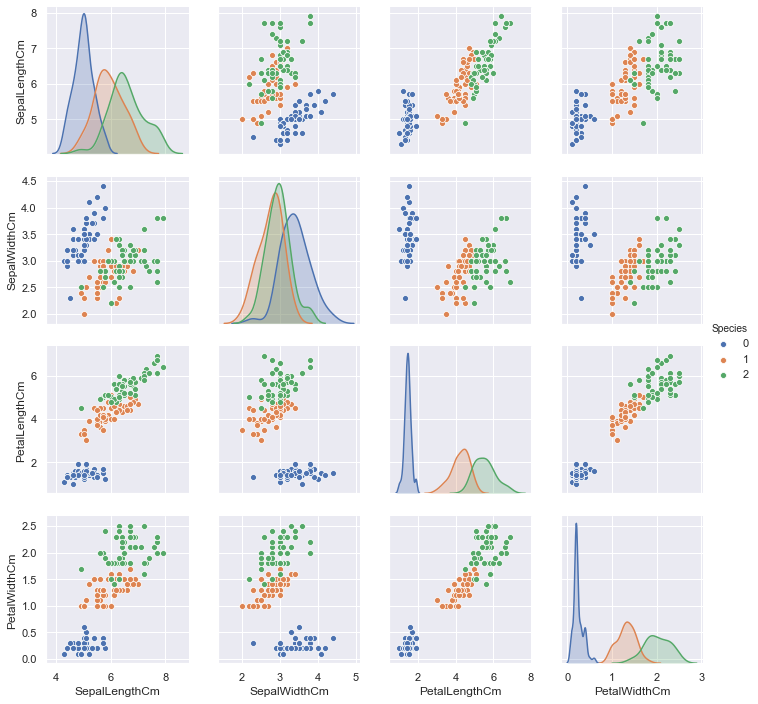

In [77]:
snsobj = sns.pairplot(data=data,vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'),hue= 'Species')

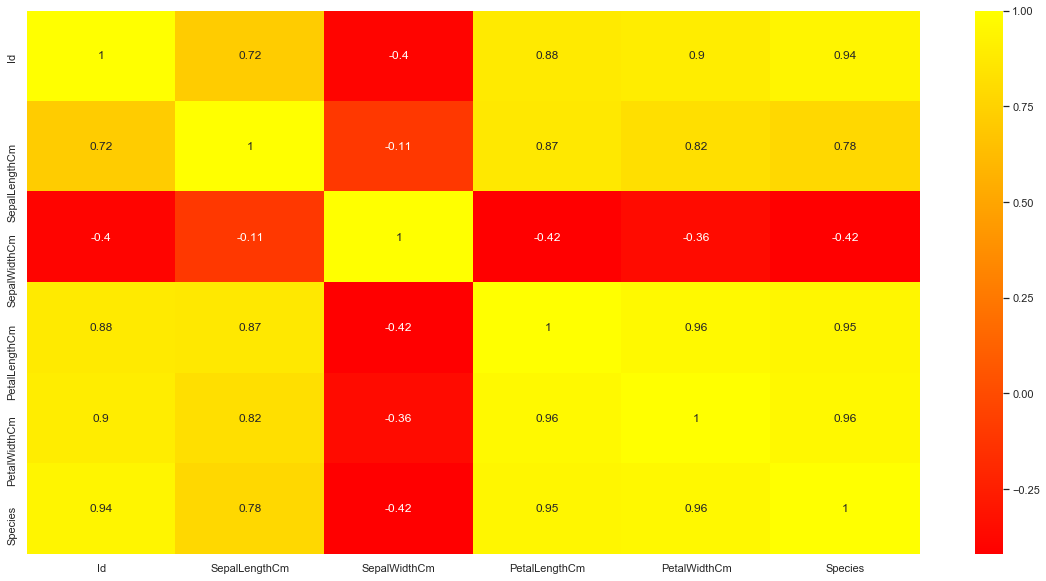

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='autumn')
plt.show()

In [79]:
x=data.iloc[:,1:3]
y=data.iloc[:,-1]

## 3. Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
scaller = StandardScaler()
labelencoder = LabelEncoder()
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)

## 4. Training and prediction

In [68]:
from sklearn.svm import SVC
kernels=['linear','rbf','poly']
for kernel in kernels:
    model=SVC(kernel=kernel)
    model.fit(x_train, y_train)
    print((" When the kernel is %s, the prediction accuracy is: {0:2.5f}{1:s}"%kernel).format(model.score(x_test,y_test)*100,"%")) 

 When the kernel is linear, the prediction accuracy is: 78.33333%
 When the kernel is rbf, the prediction accuracy is: 80.00000%
 When the kernel is poly, the prediction accuracy is: 78.33333%


In [66]:
from sklearn.model_selection import cross_val_score 
for kernel in kernels:
    model=SVC(kernel=kernel)
    score = cross_val_score(model, x_train, y_train,cv=3) 
    print((" When the kernel is %s, the CV prediction accuracy is: {0:2.5f}{1:s}"%kernel).format(score.mean()*100,"%")) 

 When the kernel is linear, the CV prediction accuracy is: 79.83686%
 When the kernel is rbf, the CV prediction accuracy is: 81.02212%
 When the kernel is poly, the CV prediction accuracy is: 78.76159%


## 5. get the graphs(online codes modified by me)

In [49]:
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel','SVC with RBF kernel','SVC with polynomial kernel']

### different features to compare

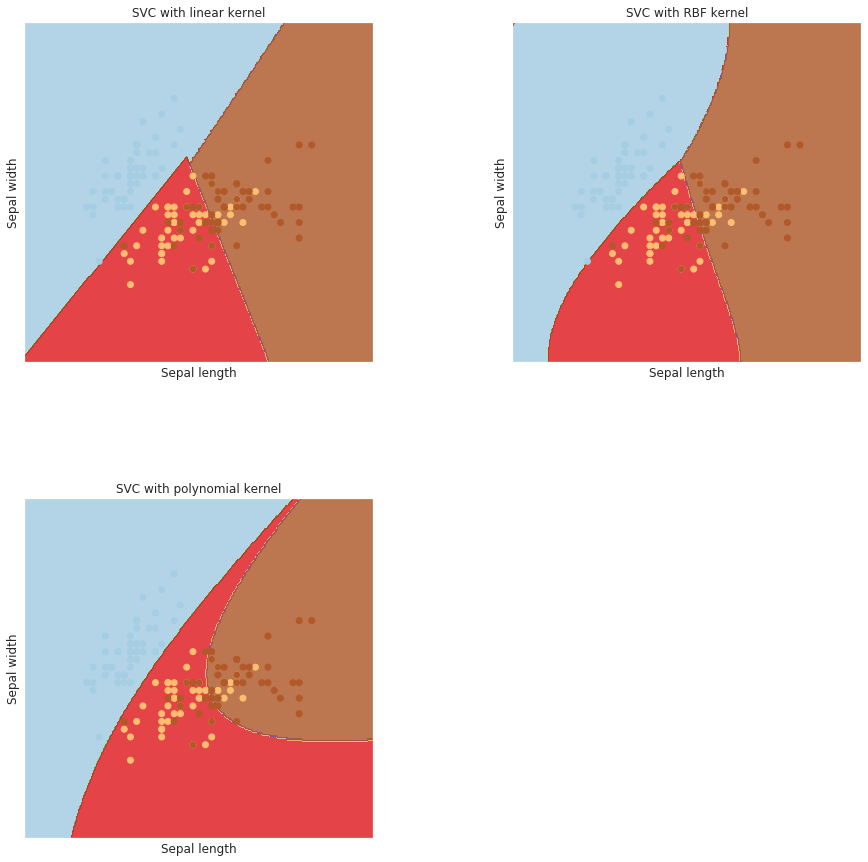

In [50]:
for i, clf in enumerate(kernels):
    plt.figure(2,figsize=(15,15))
    plt.subplot(2, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    model=SVC(kernel=clf)
    model.fit(x, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    #plt.pcolormesh(xx, yy, Z, cmap=cm_light)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

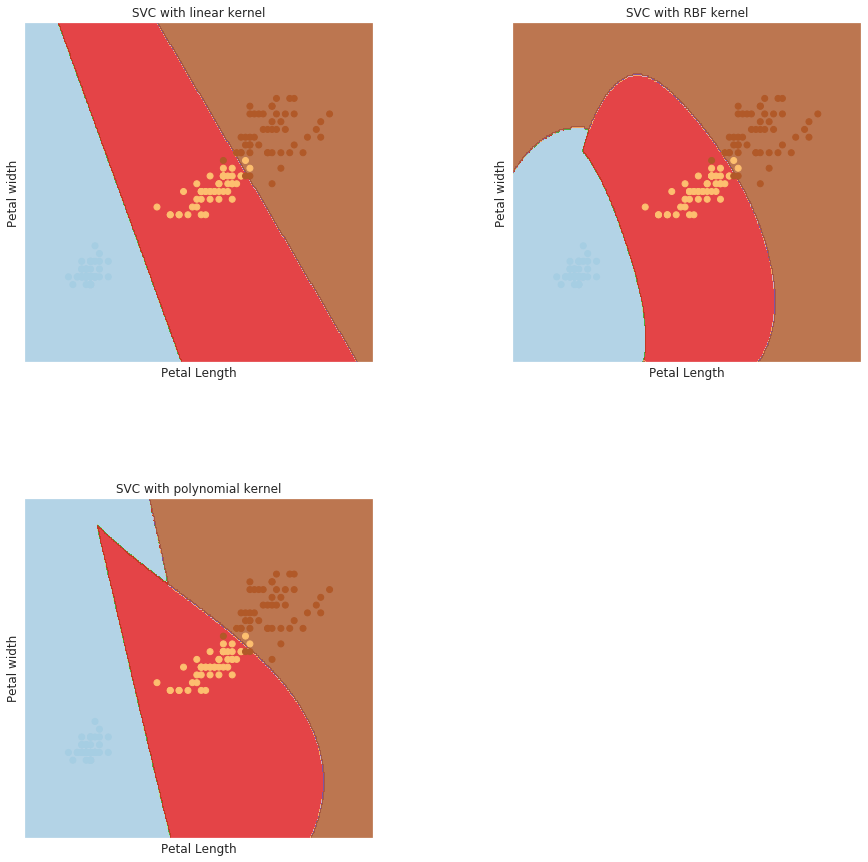

In [57]:
x = data.iloc[:,3:5]
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel','SVC with RBF kernel','SVC with polynomial kernel']
for i, clf in enumerate(kernels):
    plt.figure(2,figsize=(15,15))
    plt.subplot(2, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    model=SVC(kernel=clf)
    model.fit(x, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    #plt.pcolormesh(xx, yy, Z, cmap=cm_light)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [81]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
  
    ylim = ax.get_ylim()
   
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
  

    y = np.linspace(ylim[0], ylim[1], 30)
  
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5, 
        linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [85]:
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


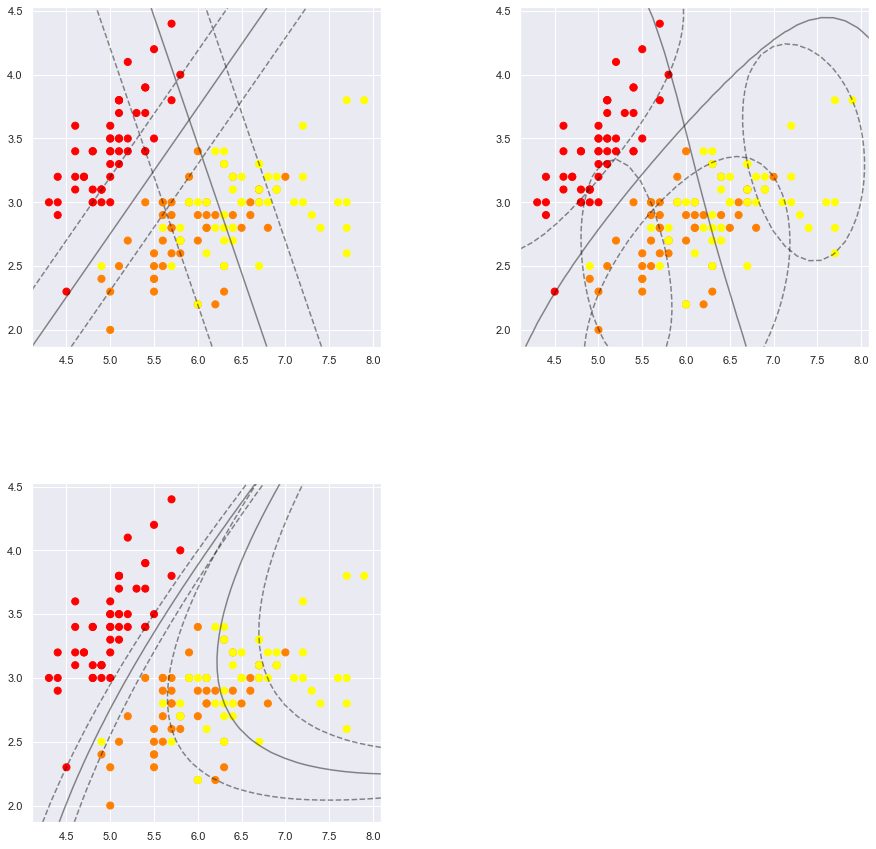

In [88]:
data1=data[(True^data['Species'].isin([2]))]
data2=data[(True^data['Species'].isin([0]))]
x1=data1.iloc[:,1:3].values
y1=data1.iloc[:,5].values
x2=data2.iloc[:,1:3].values
y2=data2.iloc[:,5].values
titles = ['SVC with linear kernel','SVC with RBF kernel','SVC with polynomial kernel']
for i, clf in enumerate(kernels):
    plt.figure(2,figsize=(15,15))
    plt.subplot(2, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    model1=SVC(kernel=clf)
    model2=SVC(kernel=clf)
    model1.fit(x1, y1)
    model2.fit(x2,y2)
    plt.title(titles[i])
    plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model1)
    plot_svc_decision_function(model2)

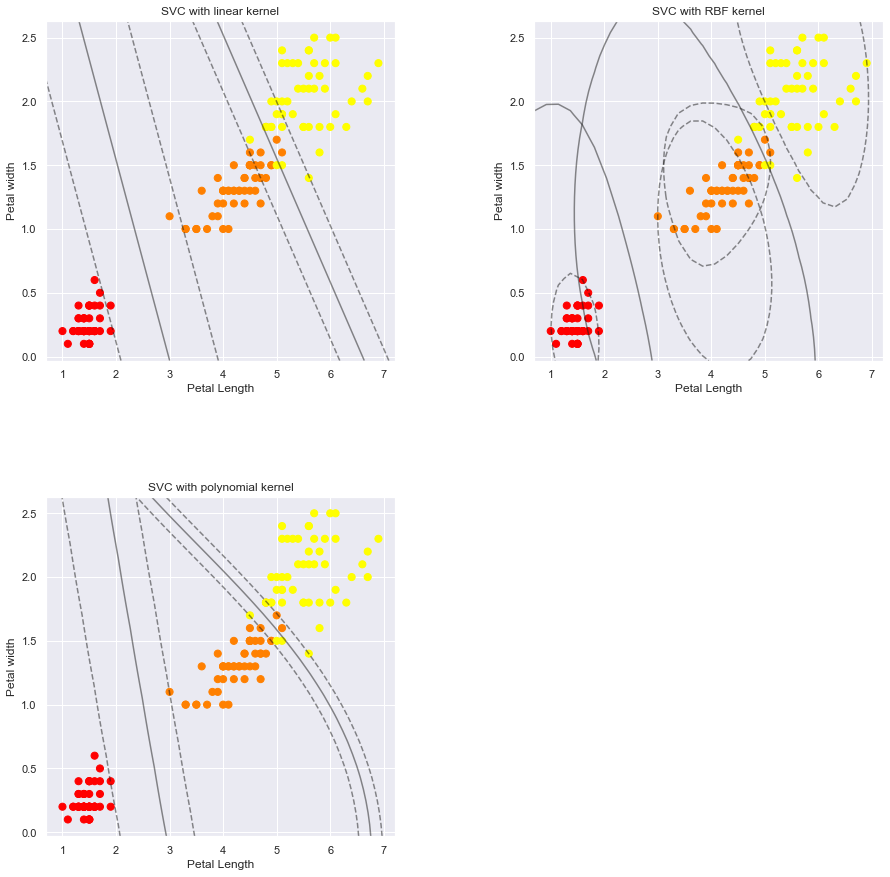

In [90]:
x1=data1.iloc[:,3:5].values
x2=data2.iloc[:,3:5].values
for i, clf in enumerate(kernels):
    plt.figure(2,figsize=(15,15))
    plt.subplot(2, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    model1=SVC(kernel=clf)
    model2=SVC(kernel=clf)
    model1.fit(x1, y1)
    model2.fit(x2,y2)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal width')
    plt.title(titles[i])
    plt.scatter(data.iloc[:, 3], data.iloc[:, 4], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model1)
    plot_svc_decision_function(model2)

## Q1:
### What type of attributes of the data?
    Then we could see Species is categorical and others are numerical.
### Test the margin of the data, is it linearly separable?
    It is not linearly separable.
### Using a scatter plot, what pattern can you see? Why?
    There are three different color dots that are divided into three clusters. Because they have similar      characteristics in the same class.

## Q2:
### Do cross-validation effect algorithms' performance?
    Yes, it improves the accuracy.
### Test SVM with at least two other kernels and compare them to the linear kernel. How much they differ?
    RBF is more accurate，RBF and polynomial can draw curves to distinguish class.